# Skill Share Assignment: Predicting Car Sales PricesUsing ANN

# Title: ANN Car Sales Price Prediction
Objective:
Build and train an Artificial Neural Network (ANN) to predict car sales prices based on features such as Year, Mileage, Engine Size, etc.
Overview:
In this notebook, we will:
- Load and Explore the Dataset: Use Pandas to load the data, inspect its structure, and check for missing values.
- Preprocess the Data: Encode categorical variables, scale numerical features with StandardScaler, and split the data into training and testing sets.
- Build the ANN: Construct an ANN using Keras/TensorFlow with two hidden layers (64 and 32 neurons) and a single output neuron (linear activation).
- Compile the Model: Use the Adam optimizer and Mean Squared Error (MSE) as the loss function; track Mean Absolute Error (MAE) as a metric.
- Train the Model: Train for 100 epochs with a validation split using EarlyStopping to avoid overfitting.
- Evaluate the Model: Evaluate it on the test set (using MAE, MSE, and R²) and visualize predicted vs. actual prices.
- Make Predictions: Demonstrate how to process and predict a single new car example.
A bonus section shows how to experiment


# Load and Explore the Dataset
In this step, we load the dataset (assumed to be named Car_sales.csv) using Pandas. We then display the column names, shape, and data types. We also check for missing values and provide brief descriptions of each feature.


In [158]:
# Import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

# Display basic information: shape, columns, and data types
print("Dataset Shape:", df.shape)
print("Dataset Information:")
df.info()

# Show summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset Shape: (500, 9)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB

Summary Statistics:
           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465  


In this cell, we first import the dataset using pd.read_csv(). We then inspect the structure using df.info(), view summary statistics with df.describe(), and check for missing values using df.isnull().sum(). Understanding the dataset is crucial for planning our preprocessing steps.latin1 (or ISO-8859-1) is a more forgiving encoding that can decode any byte sequence.


# Preprocessing the Data
Step 2: Preprocessing
In this step, we perform the following actions:
- Encode Categorical Variables: We encode columns such as Make, Model, and Fuel_type into numerical values. (Here, we use LabelEncoder for simplicity; in production you might prefer one-hot encoding if there’s no ordinal relationship.)
- Scale Numerical Features: We use StandardScaler to scale numerical features (Year, Mileage, and EngineSize) so that they have a mean of 0 and a standard deviation of 1. This is important for neural network convergence.
- Split the Dataset: Finally, we split our dataset into training and testing sets (80% train, 20% test).


In [159]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned columns:", df.columns.tolist())

# Step 2: Drop irrelevant columns (adjust if names differ)
df = df.drop(columns=["customer name", "customer e-mail"])

# Step 3: Encode categorical variables
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

# Step 4: Scale numerical features
numerical = ['age', 'annual salary', 'credit card debt', 'net worth']
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

# Step 5: Split dataset
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Preprocessing complete. X_train shape:", X_train.shape)


Cleaned columns: ['customer name', 'customer e-mail', 'country', 'gender', 'age', 'annual salary', 'credit card debt', 'net worth', 'car purchase amount']
✅ Preprocessing complete. X_train shape: (400, 6)


Here, we encode the categorical features so that they can be processed by our ANN. We then standardize the numerical features using StandardScaler to ensure that every feature contributes equally during training. Finally, an 80/20 train-test split is performed to prepare our data for training and unbiased evaluation.


# Step 3: Build the ANN
We now construct our neural network using Keras (a high-level API of TensorFlow). The architecture is as follows:
- Input Layer: Accepts the number of features from the preprocessed dataset.
- First Hidden Layer: 64 neurons with ReLU activation.
- Second Hidden Layer: 32 neurons with ReLU activation.
- Output Layer: 1 neuron with linear activation since this is a regression task.
Activation Rationale:
- ReLU: Helps model non-linearities and is computationally efficient.
- Linear Activation: Appropriate for continuous value predictions such as price.


In [160]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + first hidden layer with 64 neurons
    Dense(32, activation='relu'),                                     # Second hidden layer with 32 neurons
    Dense(1, activation='linear')                                     # Output layer for regression prediction
])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In this cell we define our ANN. The input shape is determined by the number of features in the training data. Two hidden layers use ReLU activation which is ideal for mitigating issues like the vanishing gradient problem. The output layer uses a linear activation because we want to predict a continuous value (car price).

# Step 4: Compile the Model
We compile the model using:
- Optimizer: Adam (an adaptive optimizer that adjusts the learning rate throughout training).
- Loss Function: Mean Squared Error (MSE) which penalizes larger errors more strongly and is suitable for regression.
- Metrics: Mean Absolute Error (MAE) is tracked for interpretability.


In [161]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


Adam is chosen for its versatility and adaptive learning rate abilities, which often yield faster convergence. MSE is the customary loss for regression problems, and MAE is added as an additional performance metric for clear error interpretation.

# Step 5: Train the Model
We now train our model for up to 100 epochs with a 20% validation split. We use EarlyStopping to monitor the validation loss and halt training if it does not improve for 10 consecutive epochs. This helps prevent overfitting.


In [162]:

from tensorflow.keras.callbacks import EarlyStopping

# Train model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop])


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2089663744.0000 - mae: 44298.3516 - val_loss: 1937129088.0000 - val_mae: 42907.5078
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1969083776.0000 - mae: 43109.1055 - val_loss: 1934810880.0000 - val_mae: 42880.7500
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2024007296.0000 - mae: 43741.0234 - val_loss: 1932313344.0000 - val_mae: 42851.8945
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2119067392.0000 - mae: 44665.6953 - val_loss: 1929393792.0000 - val_mae: 42818.1250
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2062561664.0000 - mae: 44157.7383 - val_loss: 1925550720.0000 - val_mae: 42773.6484
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1990296192.0000 - mae: 43238.4922 - val_loss: 1920782976.0000 - val_mae: 42718.3828
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2043656064.0000 - mae: 43943.1367 - val_loss: 1914912768.0000 - val_mae: 42650.20

This cell trains the model using an 80/20 split for training and validation. The EarlyStopping callback stops training early if the validation loss does not decrease for 10 epochs, thus saving time and reducing overfitting.
Additionally, you can visualize training progress by plotting the training and validation loss:


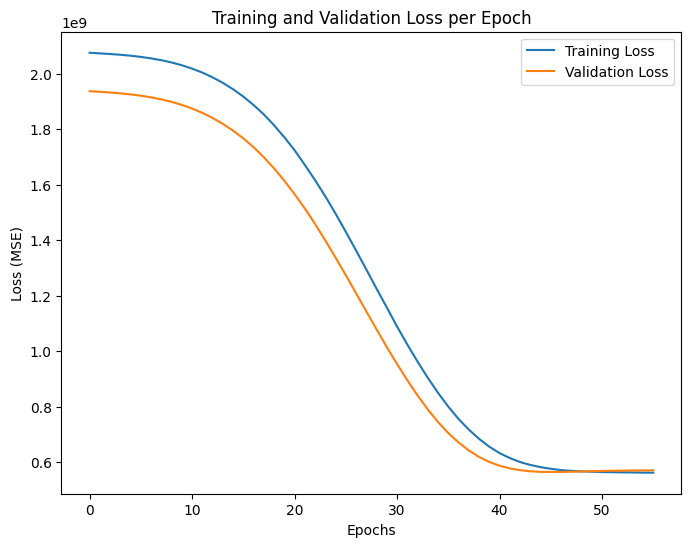

In [163]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
This code visualizes the model's training and validation loss over each epoch to evaluate learning performance:

matplotlib.pyplot is imported as plt for plotting.

A figure of size 8×6 inches is created.

plt.plot(history.history['loss']) plots training loss per epoch.

plt.plot(history.history['val_loss']) plots validation loss per epoch.

xlabel, ylabel, and title add context to the plot.

legend() distinguishes the two loss lines.

show() renders the final plot.

By comparing the loss curves, we can assess overfitting, underfitting, or good generalization during training.

# Step 6: Evaluate the Model
With our trained model, we evaluate its performance on the test set using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-squared (R²) Score
We also plot the predicted prices versus actual prices to visually assess performance.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 22181.212240325003
MSE: 692226988.5487108
R2 Score: -5.411102459730116


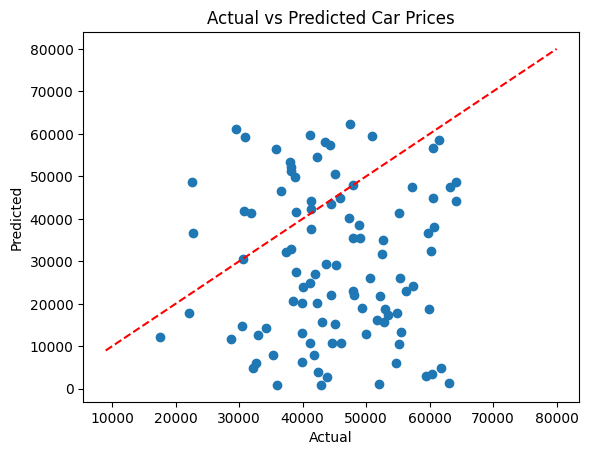

In [164]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


# Model Evaluation and Prediction Visualization
This code evaluates the trained model on the test data and visualizes the prediction performance:

matplotlib.pyplot and scikit-learn metrics are imported for plotting and evaluation.

model.predict(X_test) generates predictions on the test set.

Evaluation Metrics:

MAE (Mean Absolute Error): Measures average magnitude of errors.

MSE (Mean Squared Error): Penalizes larger errors more than MAE.

R2 Score: Indicates how well predictions approximate actual values (1 = perfect).

Evaluation results are printed.

Visualization:

A scatter plot shows the relationship between actual vs. predicted car prices.

Ideal predictions fall along the red dashed line y = x.

The plot helps detect under/over-predictions and overall model accuracy.

This step is crucial for assessing how well the model generalizes to unseen data

The evaluation metrics MAE, MSE, and R² give us numerical insight into the error and goodness-of-fit. The scatter plot compares predicted prices against the actual prices; ideally, points should lie close to the red diagonal line indicating ideal predictions.

# Step 7: Make Predictions
In this cell, we demonstrate how to preprocess and predict the price for a new car with custom features.
Example Car:
- Make: Toyota
- Model: Corolla
- Fuel_type: Petrol
- Year: 2015
- Mileage: 50000
- EngineSize: 1.8
Note: In a production setting, you would save the fitted encoders and scaler from training and reuse them for new data. Here, for the sake of demonstration, we re-fit a new LabelEncoder. Ensure that the encoding mirrors that of the training data.


In [165]:
# 1) Imports & Load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import joblib

# load
df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")
# clean column names
df.columns = df.columns.str.lower().str.strip()
# drop useless columns
df = df.drop(columns=["customer name", "customer e-mail"])

# 2) Split features/target
X = df.drop(columns=["car purchase amount"])
y = df["car purchase amount"]

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Build preprocessing pipeline
cat_feats = ["country", "gender"]
num_feats = ["age", "annual salary", "credit card debt", "net worth"]

preprocessor = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_feats),
    ("scale", StandardScaler(), num_feats),
])

# fit on train, transform train & test
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

# save the preprocessor for later
joblib.dump(preprocessor, "ct_preprocessor.pkl")

# 5) Build the ANN
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_pre.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="linear"),
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

# 6) Train with EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = model.fit(
    X_train_pre, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[es],
    batch_size=32,
    verbose=2
)

# save model
model.save("car_price_model.keras")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 - 1s - 101ms/step - loss: 2076188032.0000 - mae: 44201.0039 - val_loss: 1938705664.0000 - val_mae: 42925.7266
Epoch 2/100
10/10 - 0s - 9ms/step - loss: 2076154624.0000 - mae: 44200.6406 - val_loss: 1938671232.0000 - val_mae: 42925.3320
Epoch 3/100
10/10 - 0s - 15ms/step - loss: 2076114944.0000 - mae: 44200.1992 - val_loss: 1938626944.0000 - val_mae: 42924.8281
Epoch 4/100
10/10 - 0s - 12ms/step - loss: 2076061056.0000 - mae: 44199.6094 - val_loss: 1938567424.0000 - val_mae: 42924.1484
Epoch 5/100
10/10 - 0s - 16ms/step - loss: 2075986304.0000 - mae: 44198.8008 - val_loss: 1938485888.0000 - val_mae: 42923.2266
Epoch 6/100
10/10 - 0s - 14ms/step - loss: 2075883520.0000 - mae: 44197.6914 - val_loss: 1938374272.0000 - val_mae: 42921.9648
Epoch 7/100
10/10 - 0s - 14ms/step - loss: 2075744256.0000 - mae: 44196.1797 - val_loss: 1938221056.0000 - val_mae: 42920.2578
Epoch 8/100
10/10 - 0s - 15ms/step - loss: 2075552000.0000 - mae: 44194.1055 - val_loss: 1938017024.0000 - val_

In [166]:
def predict_new(sample: dict):
    """
    sample must have keys:
      country, gender, age,
      annual salary, credit card debt, net worth
    e.g. {"country":"Brazil","gender":1,"age":50,
           "annual salary":60000,"credit card debt": 5000,
           "net worth": 350000}
    """
    # load artifacts
    ct = joblib.load("ct_preprocessor.pkl")
    m  = tf.keras.models.load_model("car_price_model.keras")
    # dataframe
    df_new = pd.DataFrame([sample])
    # preprocess + predict
    Xn = ct.transform(df_new)
    p  = m.predict(Xn).squeeze()
    return p

# example
new_car = {
    "country":"Brazil",
    "gender":1,
    "age":50,
    "annual salary":60000,
    "credit card debt": 5000,
    "net worth": 350000
}
print(f"Predicted purchase amount: ${predict_new(new_car):,.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted purchase amount: $18,379.85


# Predicting Car Purchase Amount for New Data
This code defines a function to predict car purchase amounts for a new single customer sample using a pre-trained neural network model:

Input Format: The input must be a dictionary with keys:
country, gender, age, annual salary, credit card debt, and net worth.

Artifacts Loaded:

ct_preprocessor.pkl: A saved ColumnTransformer used to preprocess the input (e.g., encoding, scaling).

car_price_model.keras: The trained Keras model that predicts car purchase prices.

Steps:

The input dictionary is converted to a DataFrame.

The data is preprocessed using the same transformations as during training.

The model predicts the output, and .squeeze() ensures a scalar value.

Example:

A sample dictionary is passed to the function, and the predicted price is printed in currency format.

This modular design ensures new predictions are made consistently using the same preprocessing and model pipeline as during training.

This cell shows how to handle a new input: first, we encode and scale the features in the same manner as for the training data, and then we predict using the trained ANN. Storing the fitted encoders and scaler is good practice to ensure consistent preprocessing for new samples.

# bonus: Experiment with different network architectures (e.g., adding more layers or neurons) andobserve how it affects model performance. Document your findings and provide insightsinto the impact of these changes.


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def build_and_train_model(X_train, y_train, X_val, y_val, architecture, epochs=100):
    model = Sequential()
    # Build the architecture
    for i, units in enumerate(architecture):
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
        else:
            model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=[early_stop],
        verbose=0
    )
    return model, history


In [168]:
architectures = {
    "Shallow (32)": [32],
    "Baseline (64,32)": [64, 32],
    "Deep (128,64,32)": [128, 64, 32],
    "Very Deep (128, 128, 64, 32)": [128, 128, 64, 32],
}


In [169]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load and clean the data
df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")
df.columns = df.columns.str.strip().str.lower()
df = df.drop(columns=["customer name", "customer e-mail"])

# Define feature categories
categorical_features = ["country", "gender"]
numerical_features = ["age", "annual salary", "credit card debt", "net worth"]
target = "car purchase amount"

# Split into X and y
X = df[categorical_features + numerical_features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
from sklearn.pipeline import Pipeline

# Preprocessing steps
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
])


In [171]:
# Fit on training data, transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [172]:
import tensorflow as tf

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile & train
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.fit(X_train_processed, y_train, validation_data=(X_test_processed, y_test), epochs=50, batch_size=16)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2036633984.0000 - mae: 43850.5117 - val_loss: 2156730368.0000 - val_mae: 45263.2344
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2055293952.0000 - mae: 44124.1523 - val_loss: 2156345856.0000 - val_mae: 45259.0938
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2082368128.0000 - mae: 44313.3320 - val_loss: 2155327744.0000 - val_mae: 45248.2305
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2018140544.0000 - mae: 43768.3672 - val_loss: 2153077248.0000 - val_mae: 45224.3945
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2101747968.0000 - mae: 44560.2148 - val_loss: 2148835584.0000 - val_mae: 45179.6914
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1983001600.0000 - mae: 43214.0195 - val_loss: 2141667328.0000 - val_mae: 45104.6836
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2053988224.0000 - mae: 44017.3086 - val_loss: 2130745728.0000 - val_mae: 44990.8633
Epoch 8/50
25/25 

In [173]:
y_pred = model.predict(X_test_processed).squeeze()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
